In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from seminartools.data import read_inflation
from seminartools.models.pca_var_model import PCAVARModel

# 1. Read data

In [3]:
df_inflation = read_inflation()
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
23311,PRT,182,Portugal,1970-04-01,0.000000
21697,NZL,196,New Zealand,1970-04-01,0.015421
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
9062,FIN,172,Finland,1970-04-01,0.008333
13232,IRL,178,Ireland,1970-04-01,0.029871
...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080
26740,SWE,144,Sweden,2023-01-01,0.014955
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
10308,GBR,112,United Kingdom,2023-01-01,0.008814


# 2. AR model per country

In [4]:
model = PCAVARModel(num_pcs=2, lags = [1, 2, 3, 4], standardize_pre_post = True)
model

In [5]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
23311,PRT,182,Portugal,1970-04-01,0.000000
21697,NZL,196,New Zealand,1970-04-01,0.015421
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
9062,FIN,172,Finland,1970-04-01,0.008333
13232,IRL,178,Ireland,1970-04-01,0.029871
...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080
26740,SWE,144,Sweden,2023-01-01,0.014955
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
10308,GBR,112,United Kingdom,2023-01-01,0.008814


In [19]:
#model.fit(df_inflation.query("yearmonth <= '2010-01-01'"))
model.fit(df_inflation)

Text(0.5, 1.0, 'Fraction of variance explained by each principal component')

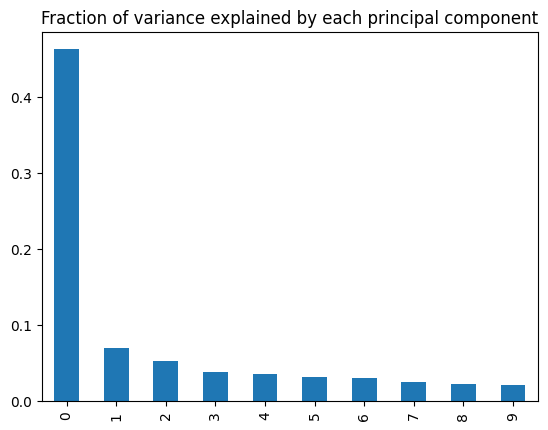

In [20]:
import matplotlib.pyplot as plt

pd.Series(model.all_eigenvalues).pipe(lambda x: x / x.sum()).head(10).plot.bar()
plt.title("Fraction of variance explained by each principal component")

In [21]:
(model.all_eigenvalues[0] + model.all_eigenvalues[1]) / sum(model.all_eigenvalues)

0.532580669038649

PC1 and PC2 seem to combine 95% of the variance in inflation together.

<Axes: xlabel='Country'>

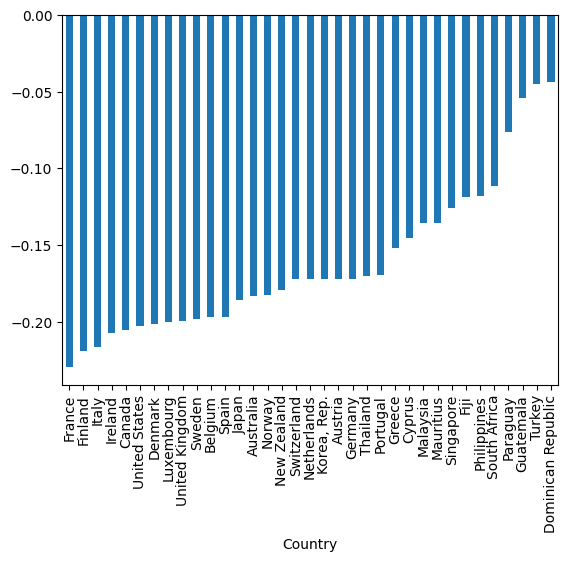

In [22]:
pd.Series(model.all_eigenvectors[:, 0], index = model.data_wide_columns).sort_values().plot.bar()

PC1 dominated by Peru and Argentina

# 3. Evaluation

In [23]:
df_inflation["Country"].unique()

array(['Portugal', 'New Zealand', 'Dominican Republic', 'Finland',
       'Ireland', 'Austria', 'Japan', 'South Africa', 'Korea, Rep.',
       'Fiji', 'Paraguay', 'Malaysia', 'Sweden', 'Switzerland',
       'Thailand', 'Cyprus', 'Mauritius', 'Greece', 'France', 'Denmark',
       'Netherlands', 'Turkey', 'Singapore', 'Germany', 'Luxembourg',
       'Guatemala', 'Norway', 'Belgium', 'United States', 'Canada',
       'Italy', 'United Kingdom', 'Australia', 'Spain', 'Philippines'],
      dtype=object)

In [24]:
preds = model.predict(df_inflation)
preds

,yearmonth,Country,inflation
7245,2023-04-01,Australia,0.016818
7246,2023-04-01,Austria,0.011773
7247,2023-04-01,Belgium,0.013593
7248,2023-04-01,Canada,0.013708
7249,2023-04-01,Cyprus,0.012103
7250,2023-04-01,Denmark,0.015508
7251,2023-04-01,Dominican Republic,0.017310
7252,2023-04-01,Fiji,0.016422
7253,2023-04-01,Finland,0.016989
7254,2023-04-01,France,0.015288


# 4. H-period ahead forecasting

In [25]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
23311,PRT,182,Portugal,1970-04-01,0.000000
21697,NZL,196,New Zealand,1970-04-01,0.015421
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
9062,FIN,172,Finland,1970-04-01,0.008333
13232,IRL,178,Ireland,1970-04-01,0.029871
...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080
26740,SWE,144,Sweden,2023-01-01,0.014955
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
10308,GBR,112,United Kingdom,2023-01-01,0.008814


In [26]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df_inflation, "2010-01-01", h=1)
forecast

,yearmonth,Country,inflation
0,2010-01-01,Australia,0.004290
1,2010-01-01,Austria,0.002576
2,2010-01-01,Belgium,0.001855
3,2010-01-01,Canada,0.002129
4,2010-01-01,Cyprus,0.001677
...,...,...,...
1850,2023-01-01,Switzerland,0.006100
1851,2023-01-01,Thailand,0.010023
1852,2023-01-01,Turkey,0.036119
1853,2023-01-01,United Kingdom,0.019709


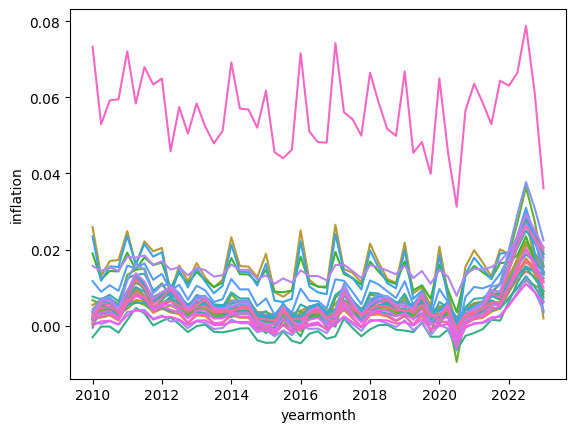

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(
    data = forecast,
    x = "yearmonth",
    y = "inflation",
    hue = "Country"
)
# turn off legend
plt.legend().remove()

# 5. Compare the forecast with the actual data

In [28]:
forecast_merged = forecast.copy().rename(columns={"inflation": "pred"})
forecast_merged = forecast_merged.merge(
    df_inflation[["Country", "yearmonth", "inflation"]],
    on=["Country", "yearmonth"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,yearmonth,Country,pred,actual
1755,2022-07-01,Denmark,0.019954,0.023957
1756,2022-07-01,Dominican Republic,0.027978,0.013293
1757,2022-07-01,Fiji,0.021358,0.007368
1758,2022-07-01,Finland,0.022110,0.016000
1759,2022-07-01,France,0.019985,0.011638
...,...,...,...,...
1850,2023-01-01,Switzerland,0.006100,0.010084
1851,2023-01-01,Thailand,0.010023,0.000463
1852,2023-01-01,Turkey,0.036119,0.116249
1853,2023-01-01,United Kingdom,0.019709,0.008814


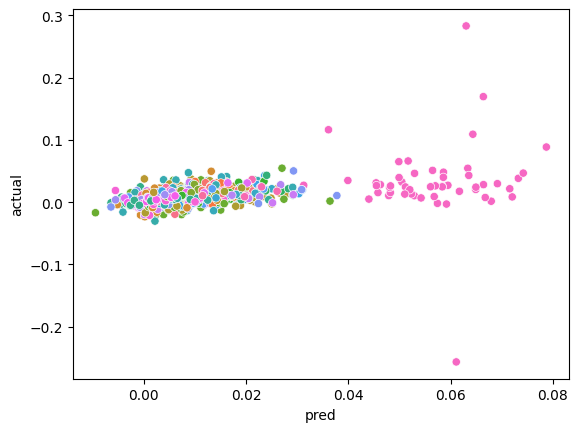

In [29]:
sns.scatterplot(
    data = forecast_merged,
    x = "pred",
    y = "actual",
    hue = "Country"
)
plt.legend().remove()

In [30]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"])
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     420.9
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.85e-84
Time:                        20:38:29   Log-Likelihood:                 5445.1
No. Observations:                1855   AIC:                        -1.089e+04
Df Residuals:                    1853   BIC:                        -1.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.000      5.756      0.000       0.001       0.003
pred           0.5935      0.029     20.516      0.000       0.537       0.650
==============================================================================
Omnibus:                     1414.640   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3871159.688
Skew:                          -1.988   Prob(JB):                         0.00
Kurtosis:                     226.762   Cond. No.                         96.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model.var.models["PC1"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PC1   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     115.1
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           2.20e-70
Time:                        20:38:30   Log-Likelihood:                -406.07
No. Observations:                 208   AIC:                             830.1
Df Residuals:                     199   BIC:                             860.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0077      0.121      0.064      0.949      -0.231       0.246
PC1_lag_1      0.5163      0.069      7.534      0.000       0.381       0.651
PC2_lag_1     -0.4445      0.109     -4.061      0.000      -0.660      -0.229
PC1_lag_2      0.1371      0.077      1.778      0.077      -0.015       0.289
PC2_lag_2     -0.0223      0.126     -0.177      0.860      -0.271       0.226
PC1_lag_3      0.0505      0.078      0.651      0.516      -0.103       0.204
PC2_lag_3      0.2660      0.125      2.124      0.035       0.019       0.513
PC1_lag_4      0.2457      0.067      3.677      0.000       0.114       0.377
PC2_lag_4      0.1918      0.115      1.668      0.097      -0.035       0.419
==============================================================================
Omnibus:                       18.293   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.526
Skew:                          -0.267   Prob(JB):                     6.47e-12
Kurtosis:                       5.379   Cond. No.                         9.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""